In [79]:
import numpy as np
import pandas as pd
from scipy.optimize import nnls
pd.set_option('display.max_rows', None)

In [86]:
path="C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"#proportion_pxt_neh/"
time=31
# pw=0.046

In [87]:
data=pd.read_csv(path+"__FAS_MOUSE.csv")
# data=data[data.exp_Time==time]
data=data[data.exp_Time==time].reset_index(drop="True")

data=data[['Peptied', 'charge', 'exp_Time', 'NEH', 
       'NEH_new', 'new_RMSE', 'new_cor', 'new_rsq', 'map', 'mean', 'median',
       'sd']]
data["dif"]=abs(data.NEH - data.NEH_new)
print(data.shape)

# data=data[data.new_cor>0.9]
# print(data.shape) 

# data=data[data.new_rsq>0.9]
# print(data.shape)

# data=data[data.new_error<0.05]
# print(data.shape) 

# data=data[data["mean"]<0.016]
# print(data.shape) 

# data=data[data.new_RMSE<0.015]

print(data.shape)
data.sort_values(by="dif")[['Peptied', 'charge', 'exp_Time', 'NEH',  'NEH_new','dif', 'new_RMSE', 'map']]

(0, 13)
(0, 13)


,Peptied,charge,exp_Time,NEH,NEH_new,dif,new_RMSE,map


In [82]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\hmdebern.UTMB-USERS-M\.conda\envs\myenv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\hmdebern.UTMB-USERS-M\.conda\envs\myenv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


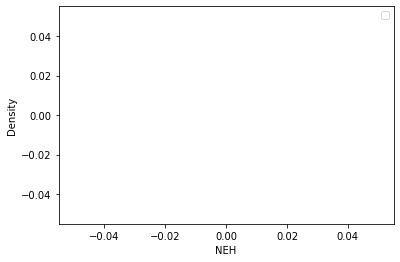

In [83]:
sns.kdeplot(data.NEH, x="NEH",label="T NEH")
sns.kdeplot(data.NEH_new, x="NEH_new",label="T NEH")
plt.legend()

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.82999744, 0.86999744, 0.90999744, 0.94999744, 0.98999744,
        1.02999744, 1.06999744, 1.10999744, 1.14999744, 1.18999744,
        1.22999744, 1.26999744, 1.30999744, 1.34999744, 1.38999744,
        1.42999744, 1.46999744, 1.50999744, 1.54999744, 1.58999744,
        1.62999744, 1.66999744, 1.70999744, 1.74999744, 1.78999744,
        1.82999744]),
 <BarContainer object of 25 artists>)

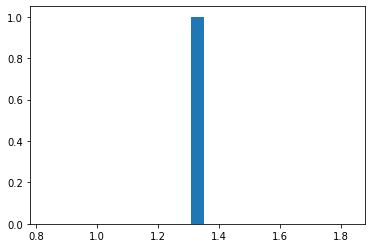

In [78]:
plt.hist(data.dif,bins=25)